In [12]:
import sklearn
import shap
shap.initjs()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(
    "./data/cs-training-resampled.csv",
    header='infer')

df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.010493,79,0,0.005852,3075.0,7,0,0,0,0.0
1,0,0.880330,43,0,1.163256,2100.0,6,0,0,0,3.0
2,1,0.132325,76,0,0.150979,10166.0,8,0,2,1,0.0
3,1,1.108420,48,0,0.165220,2880.0,4,2,0,2,2.0
4,1,0.917729,55,2,1.130248,3500.0,13,0,1,1,1.0
5,0,1.000000,61,0,0.181652,12600.0,4,0,3,0,1.0
6,0,0.348783,49,0,0.418033,8783.0,12,0,1,0,0.0
7,0,0.091503,27,0,0.119876,9000.0,9,0,0,0,0.0
8,1,0.989609,60,1,0.595626,2148.0,6,0,1,0,0.0
9,0,0.584367,48,0,0.386846,9000.0,14,0,2,0,2.0


In [13]:
X = df[df.columns[1:]]
y = df[df.columns[0]]

feature_names = list(X.columns)

seed = 1  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

X_train.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8962,0.155966,43,0,0.655653,4236.0,13,0,1,0,2.0
9870,1.000000,42,0,0.000000,3660.0,0,0,0,0,1.0
14280,1.000000,29,96,0.000000,2800.0,0,96,0,96,2.0
12883,1.000000,40,98,0.010939,3290.0,0,98,0,98,3.0
13670,0.208463,64,0,0.042128,2800.0,2,0,0,0,0.0
11492,1.122503,34,2,1.800499,400.0,3,1,0,2,1.0
9313,0.405316,29,0,1.086655,576.0,7,0,0,0,0.0
3765,0.726660,47,5,0.208055,9583.0,8,1,1,0,2.0
9305,0.968335,48,7,0.439157,3319.0,11,2,0,0,0.0
717,0.667666,46,0,1.762159,1500.0,8,0,1,0,0.0


In [14]:
y_train.head(10)

8962     0
9870     1
14280    1
12883    1
13670    0
11492    1
9313     0
3765     1
9305     1
717      0
Name: SeriousDlqin2yrs, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# We do feature scaling before training a model 
scaler = StandardScaler()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

blackbox_model = Pipeline([('scaler', scaler), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [30]:
f = lambda x: blackbox_model.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)

In [31]:
X.iloc[0,:]

RevolvingUtilizationOfUnsecuredLines       0.010493
age                                       79.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.005852
MonthlyIncome                           3075.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 0, dtype: float64

In [29]:
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, feature_names)

In [32]:
X.iloc[8,:]

RevolvingUtilizationOfUnsecuredLines       0.989609
age                                       60.000000
NumberOfTime30-59DaysPastDueNotWorse       1.000000
DebtRatio                                  0.595626
MonthlyIncome                           2148.000000
NumberOfOpenCreditLinesAndLoans            6.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 8, dtype: float64

In [28]:
shap_values_single = explainer.shap_values(X.iloc[8,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, feature_names)

In [18]:
shap_values = explainer.shap_values(X_test.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0:1000,:])


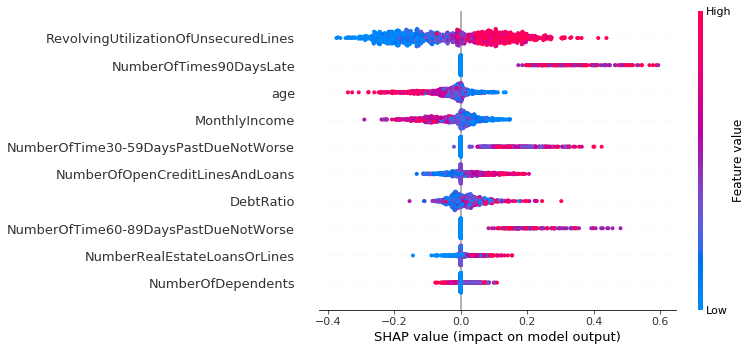

In [26]:
shap.summary_plot(shap_values, X_test.iloc[0:1000,:])